In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical


In [66]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))
datax_norm = datax/255
print('최대: {}, 최소: {}'.format(np.max(datax_norm), np.min(datax_norm)))

datax_reshape = datax_norm.reshape([60000,28*28])

최대: 1.0, 최소: 0.0


In [93]:
# Input
input_shape = (28*28,)
input_tensor = layers.Input(input_shape)

# Encoder
encoder1 = layers.Dense(700, activation = 'relu')(input_tensor)
encoder2 = layers.Dense(500, activation = 'relu')(encoder1)
encoder3 = layers.Dense(225, activation = 'relu', name = 'latent_layer')(encoder2)
latent_tensor = encoder3

# Decoder
decoder1 = layers.Dense(500, activation='relu')(latent_tensor)
decoder2 = layers.Dense(700, activation='relu')(decoder1)

# Outputs
reconstruction_output = layers.Dense(28*28, activation='relu')(decoder2)

In [94]:
ae = models.Model(input_tensor, reconstruction_output)
ae.compile(optimizer = 'Adam', loss = 'mse')
ae.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_25 (Dense)            (None, 700)               549500    
                                                                 
 dense_26 (Dense)            (None, 500)               350500    
                                                                 
 latent_layer (Dense)        (None, 225)               112725    
                                                                 
 dense_27 (Dense)            (None, 500)               113000    
                                                                 
 dense_28 (Dense)            (None, 700)               350700    
                                                                 
 dense_29 (Dense)            (None, 784)               549

In [95]:
epoch = 10
batch_size = 1024

ae.fit(datax_reshape, datax_reshape,
      batch_size = batch_size,
      epochs=epoch,
      verbose =2)

Epoch 1/10
59/59 - 4s - loss: 0.0483 - 4s/epoch - 70ms/step
Epoch 2/10
59/59 - 4s - loss: 0.0198 - 4s/epoch - 61ms/step
Epoch 3/10
59/59 - 8s - loss: 0.0141 - 8s/epoch - 134ms/step
Epoch 4/10
59/59 - 9s - loss: 0.0122 - 9s/epoch - 158ms/step
Epoch 5/10
59/59 - 11s - loss: 0.0109 - 11s/epoch - 180ms/step
Epoch 6/10
59/59 - 12s - loss: 0.0100 - 12s/epoch - 198ms/step
Epoch 7/10
59/59 - 9s - loss: 0.0094 - 9s/epoch - 160ms/step
Epoch 8/10
59/59 - 10s - loss: 0.0091 - 10s/epoch - 168ms/step
Epoch 9/10
59/59 - 10s - loss: 0.0087 - 10s/epoch - 175ms/step
Epoch 10/10
59/59 - 11s - loss: 0.0084 - 11s/epoch - 184ms/step


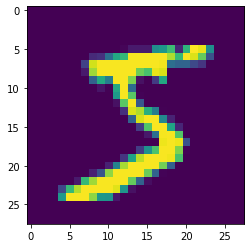

In [96]:
# 원본 데이터 확인
plt.imshow(datax_reshape[0].reshape(28,28))

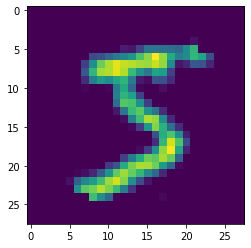

In [97]:
# 데이터를 모델에 넣고 복원시킨다
decoded_img = ae.predict(datax_reshape[0].reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [98]:
np.mean(np.abs(datax_reshape[0] - decoded_img.reshape(784,1)))


0.22959145615603999

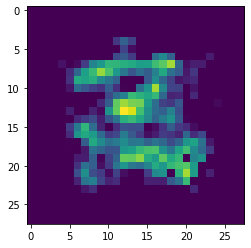

In [99]:
# np.random을 통해 random 값을 넣어서 이상치 탐지 확인
decoded_img = ae.predict(np.random.rand(784,1).reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)
plt.imshow(decoded_img)

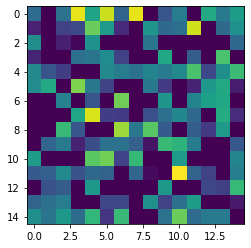

In [105]:
itermediate_layer_model = models.Model(inputs = ae.input, outputs = ae.get_layer('latent_layer').output)
itermediate_output = itermediate_layer_model.predict(datax_reshape[0].reshape(1,28*28))
latent_vector = np.array(itermediate_output)
plt.imshow(latent_vector.reshape(15,15))

In [ ]:
datax_reshape = datax_norm.reshape((-1,28,28,1))
print('최대: {}, 최소: {}'.format(np.max(datax_norm), np.min(datax_norm)))

In [12]:
## Input
input_shape = (28,28,1)
input_tensor = layers.Input(input_shape)

## Encoder
conv1 = layers.Conv2D(1,(7,7), padding='same', activation='relu')(input_tensor)
pooling1 = layers.MaxPool2D(name='imlatent_layer')(conv1)

flatten1 = layers.Flatten()(pooling1)
dense1 = layers.Dense(100,activation='relu', name='latent_layer')(flatten1)

latent_tensor = dense1

## Decoding
ae.compile(optimizer = 'Adam', loss = 'mse')

dense2 = layers.Dense(14*14, activation='relu')(latent_tensor)
reshaped = tf.reshape(dense2, [-1,14,14,1])

upsample2 = layers.UpSampling2D()(reshaped)
deconv2 = layers.Conv2DTranspose(1,(7,7), padding = 'same', activation='sigmoid')(upsample2)

# Outputs
output_tensor = deconv2

ae = models.Model(input_tensor, output_tensor)
ae.compile(optimizer = 'Adam', loss = 'mse')
ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 1)         50        
                                                                 
 imlatent_layer (MaxPooling2  (None, 14, 14, 1)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 196)               0         
                                                                 
 latent_layer (Dense)        (None, 100)               19700     
                                                                 
 dense_5 (Dense)             (None, 196)               19796     
                                                           

In [13]:
epoch=10
batch_size=1024

ae.fit(datax_reshape, datax_reshape,
      batch_size=batch_size,
      epochs=epoch,
      verbose=2)

Epoch 1/10
59/59 - 42s - loss: 0.1617 - 42s/epoch - 704ms/step
Epoch 2/10
59/59 - 44s - loss: 0.0649 - 44s/epoch - 743ms/step
Epoch 3/10
59/59 - 41s - loss: 0.0532 - 41s/epoch - 695ms/step
Epoch 4/10
59/59 - 39s - loss: 0.0465 - 39s/epoch - 660ms/step
Epoch 5/10
59/59 - 36s - loss: 0.0417 - 36s/epoch - 612ms/step
Epoch 6/10
59/59 - 33s - loss: 0.0380 - 33s/epoch - 563ms/step
Epoch 7/10
59/59 - 32s - loss: 0.0348 - 32s/epoch - 543ms/step
Epoch 8/10
59/59 - 33s - loss: 0.0324 - 33s/epoch - 565ms/step
Epoch 9/10
59/59 - 31s - loss: 0.0302 - 31s/epoch - 524ms/step
Epoch 10/10
59/59 - 29s - loss: 0.0284 - 29s/epoch - 496ms/step


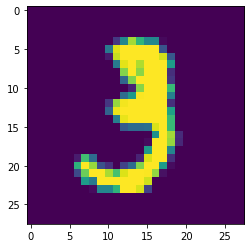

In [14]:
# 원본 데이터 확인
plt.imshow(datax_reshape[10].reshape(28,28))

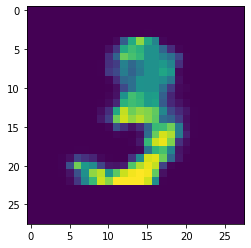

In [15]:
# 데이터를 모델에 넣고 복원시킴
decoded_img = ae.predict(datax_reshape[10].reshape(1,28,28,1))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

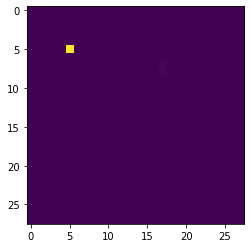

In [30]:
# np.random을 통해 random 값을 넣어서 이상치 탐지 확인
random_vector = np.random.rand(784,1)
decoded_img = ae.predict(random_vector.reshape(1,28,28,1))
decoded_img = decoded_img.reshape(28,28)
plt.imshow(decoded_img)